# Data Analysis Project: Ecommerce Customer Behaviour

## Data Overview

<b> Calling libraries

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn.preprocessing 
import seaborn as sns
# import kaggle


In [22]:
# # Downloading dataset from Kaggle
# !kaggle datasets download -d ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [23]:
# Read file and save to a dataframe
df = pd.read_excel('E Commerce Dataset.xlsx',sheet_name='E Comm').copy()
df.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [24]:
# Print out dtype, non-null count of df's columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [25]:
# Basic informations of continuos features
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [26]:
# Basic informatins of categorical features
df.describe(include='O')

# Checking for potential categorical features but represented as numerical values (Yes/No as 1/0;...)
for col in df.columns:
    if df[col].dtype == 'int64':
        if len(df[col].unique()) < 10:
            print(col,' is likely a categorical feature: ', df[col].unique())
            

Churn  is likely a categorical feature:  [1 0]
CityTier  is likely a categorical feature:  [3 1 2]
NumberOfDeviceRegistered  is likely a categorical feature:  [3 4 5 2 1 6]
SatisfactionScore  is likely a categorical feature:  [2 3 5 4 1]
Complain  is likely a categorical feature:  [1 0]


From the above list of potentially categorical features, we can easily point out that CityTier and Complain is categorical feature since:
- CityTier includes 3 value represents for 3 group of city tier.
- Complain includes 0 and 1 represents for Yes/No responses.

I will change dtype of these 2 feature.

In [27]:
df['CityTier'] = df['CityTier'].astype(str)
df['Complain'] = df['Complain'].astype(str)

In [28]:
# Count the number of duplicated data rows
df.duplicated().sum()

0

There is no duplicated data row

In [29]:
# Print all categorical features
for label in df.columns:
    if df[label].dtype == 'object' and df[label].unique().shape[0] < 10:
        print(label, df[label].unique())

PreferredLoginDevice ['Mobile Phone' 'Phone' 'Computer']
CityTier ['3' '1' '2']
PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender ['Female' 'Male']
PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus ['Single' 'Divorced' 'Married']
Complain ['1' '0']


From the above amount of customer who churn and not churn, we can see that the dataset is bias since the target Churn which = 1 take only 20% of the dataset

Notes for later analysis:
- Features with potential insights/relationship with target: Tenure, HourSpendOnApp, SatisfactionScore, Complain, CouponUsed, DaySinceLastOrder.
- Question mark on: Purchase Date (is there any seasonal trends?), Customer Age
- Relationship between Total Purchase Amount and Churn
- Relationship between Payment Method and Returns

/var/folders/cz/6kq2vkl9061f_gt1x751jn_c0000gq/T/ipykernel_1913/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

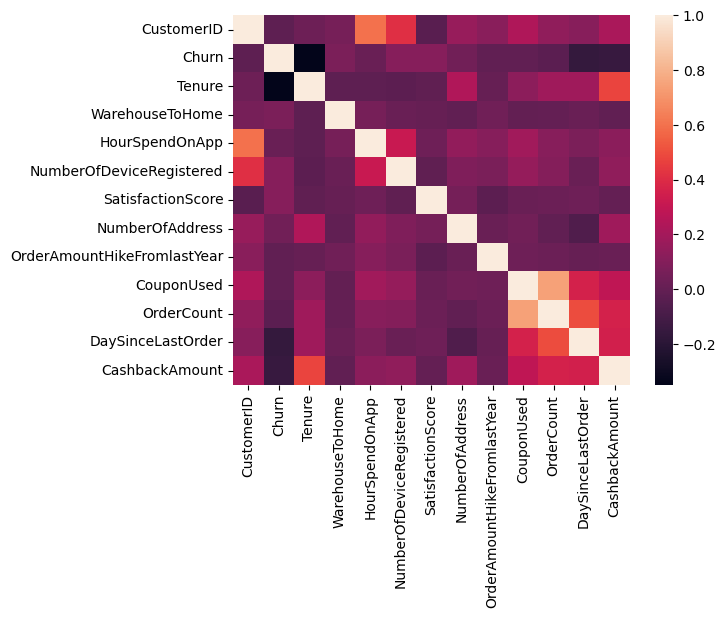

In [30]:
sns.heatmap(df.corr())

In [31]:
# Create a list of numerical columns
numerical_feature = [col for col in df.columns if df[col].dtype != 'object']
# # Remove CustomerID, Churn, Complain, CityTier from the list cuz they're categorical but under number data type.
# remove = ['CustomerID','Churn','Complain', 'CityTier']
# numerical_feature = [i for i in numerical_feature if i not in remove]
numerical_feature

['CustomerID',
 'Churn',
 'Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

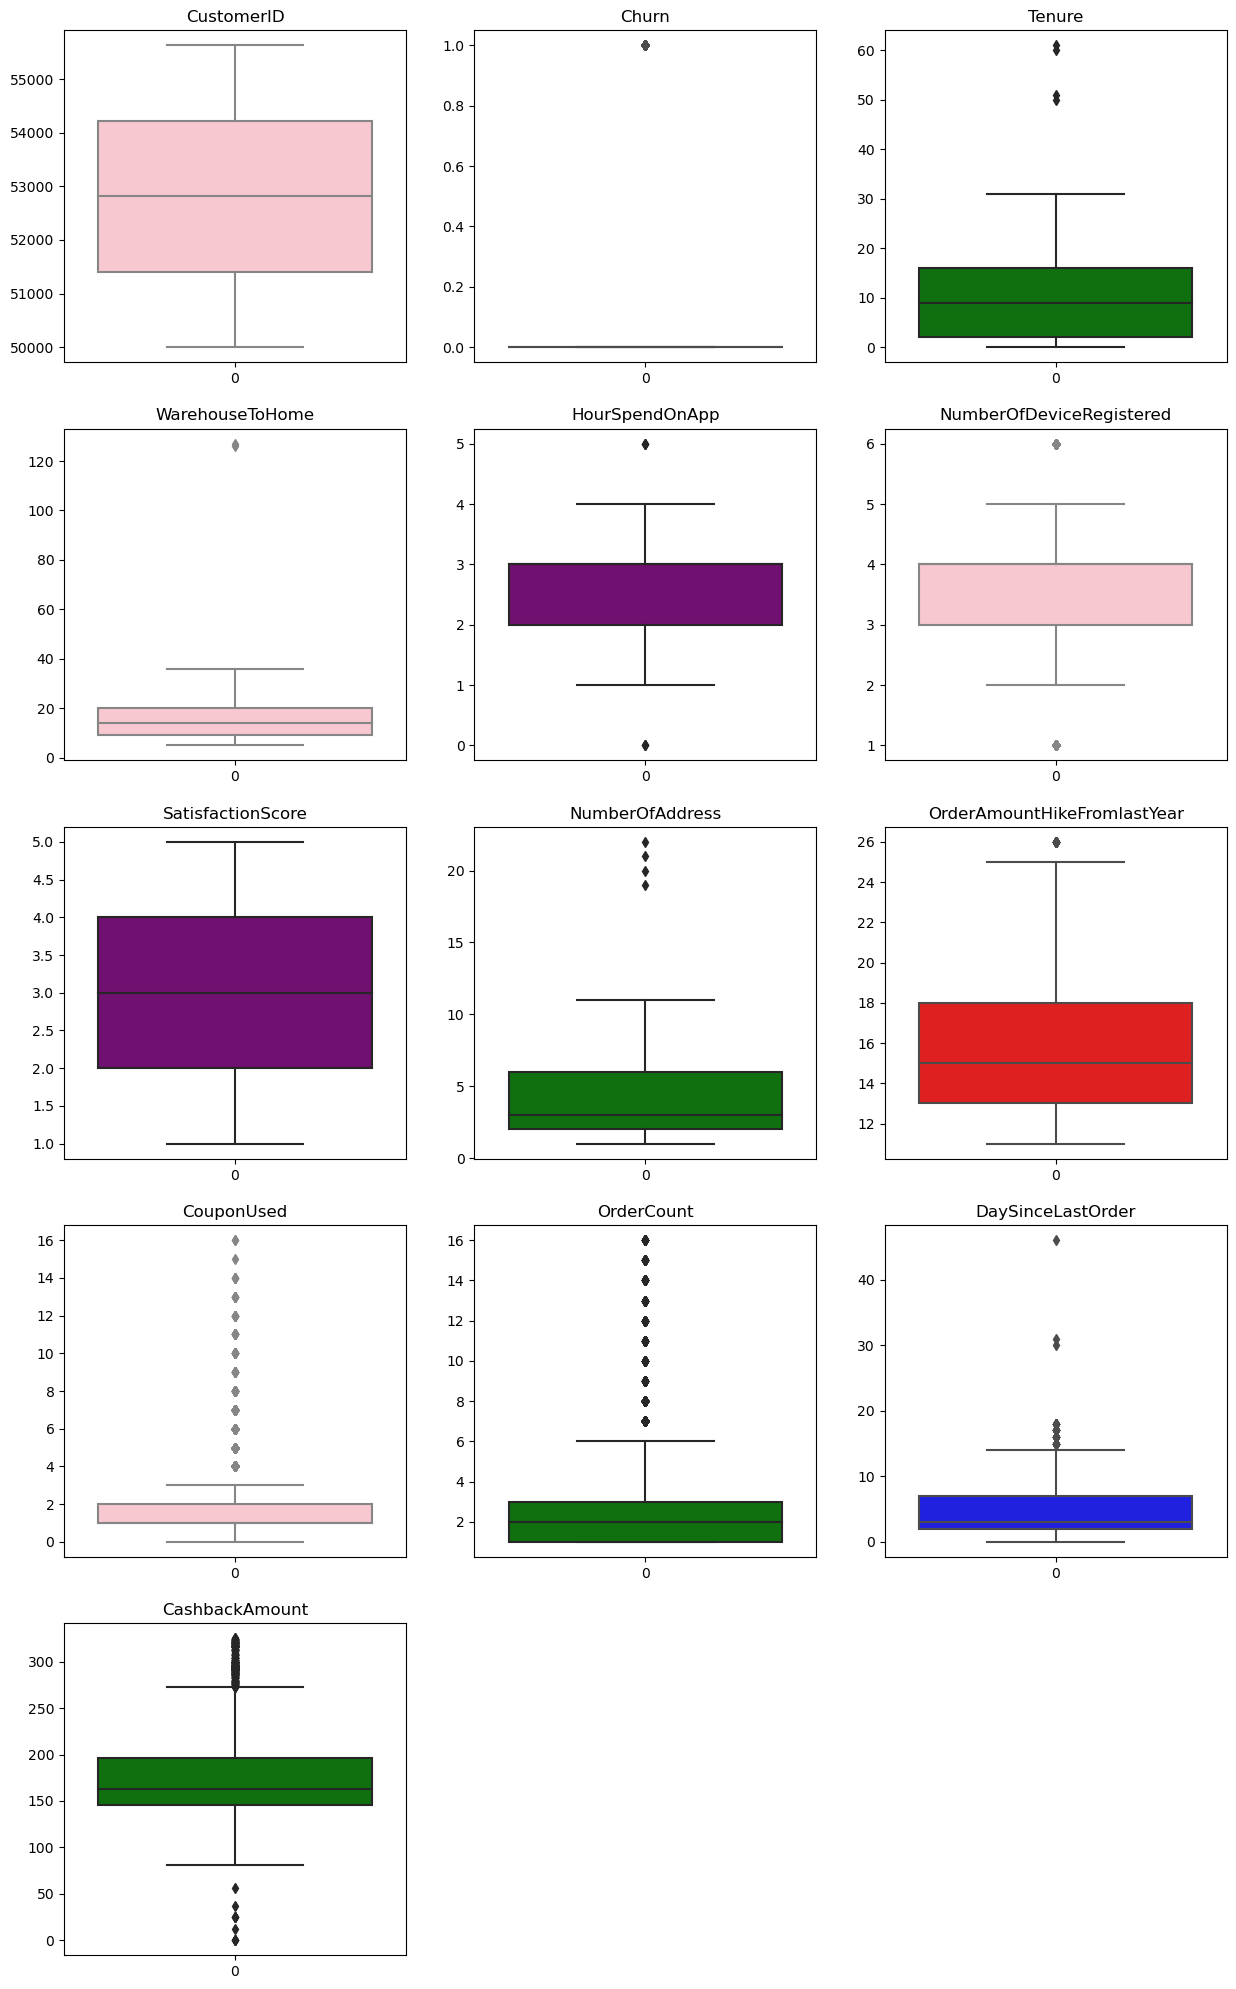

In [32]:
import random
plt.figure(figsize=(15,25))
color_list = ['red','pink','blue','green','purple']
for i, col in enumerate(numerical_feature):
    color = random.choice(color_list)
    plt.subplot(5,3,i+1)
    sns.boxplot(df[col], color=color)
    plt.title(col)

In [33]:
missing = df.isnull().sum()
missing_list = [i for i in missing.index if missing[i]>0]

# # Print number of missing values in each feature
# print(missing.sort_values(ascending=False))

# print('-'*30)

# # Print percentage of missing values in each feature

# print(missing.map(lambda x: (x/len(df))*100).sort_values(ascending=False))

for i in missing_list:
    print(i,': Missing', missing[i], end=' --- ')
    print('Percentage: {:.2f}%'.format(missing[i]/len(df)*100))

Tenure : Missing 264 --- Percentage: 4.69%
WarehouseToHome : Missing 251 --- Percentage: 4.46%
HourSpendOnApp : Missing 255 --- Percentage: 4.53%
OrderAmountHikeFromlastYear : Missing 265 --- Percentage: 4.71%
CouponUsed : Missing 256 --- Percentage: 4.55%
OrderCount : Missing 258 --- Percentage: 4.58%
DaySinceLastOrder : Missing 307 --- Percentage: 5.45%


Insights from general analysis of the dataset:
- The dataset comprises 11 continuous features, along with 2 categorical features represented as numeric values: CityTier and Complain, as well as 5 categorical features represented as objects, 1 feature as ID (Primary key) and a target 'Churn'.
- CashbackAmount feature contains significantly high number of outliers compare to others.
- There are 7 features with missing values, and the percentage of missing values ranges from 4.46% to a maximum of 5.45%

## Exploratory Data Analysis

- Our main question is "What factors caused the churn of our customer"
- So at first, let's have a look at our target: 'Churn'

Text(0.5, 1.0, 'Customer Churn')

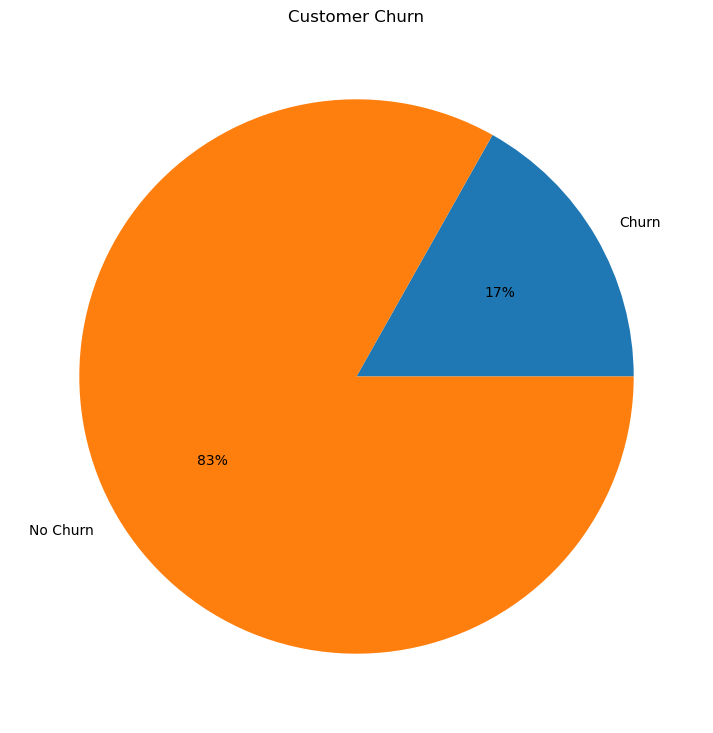

In [34]:

plt.figure(figsize=(9,9))

plt.pie([(df['Churn']==1).sum(), (df['Churn']==0).sum()], labels=['Churn','No Churn'], autopct='%.0f%%')
plt.title('Customer Churn')

Since the features can be divided into 3 lists:
- Demographic: CityTier, Gender, MaritalStatus, NumberOfAddress, NumberOfDeviceRegistered, WarehouseToHome.
- Purchasing Behaviour: Tenure, PreferLoginDevice, PreferedPaymentMethod, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount, HourSpendOnApp, PreferedOrderCat.
- Feedback information: Complain, SatisfactionScore.

The below code will create 3 list for relatively features in above 3 groups and separate the dataset into Churn and No Churn

In [35]:
demo = ['Tenure', 'CityTier',
       'WarehouseToHome', 'Gender',
       'MaritalStatus', 'NumberOfAddress']

purchase = ['Tenure', 'PreferredLoginDevice', 'PreferredPaymentMode', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

feedback = ['SatisfactionScore', 'Complain']

df_ = df[df['Churn']==1]
df_not = df[df['Churn']==0]

In [45]:
df_new = df[['CityTier']].copy()
df_new.value_counts().reset_index()

,CityTier,0
0,1,3666
1,3,1722
2,2,242


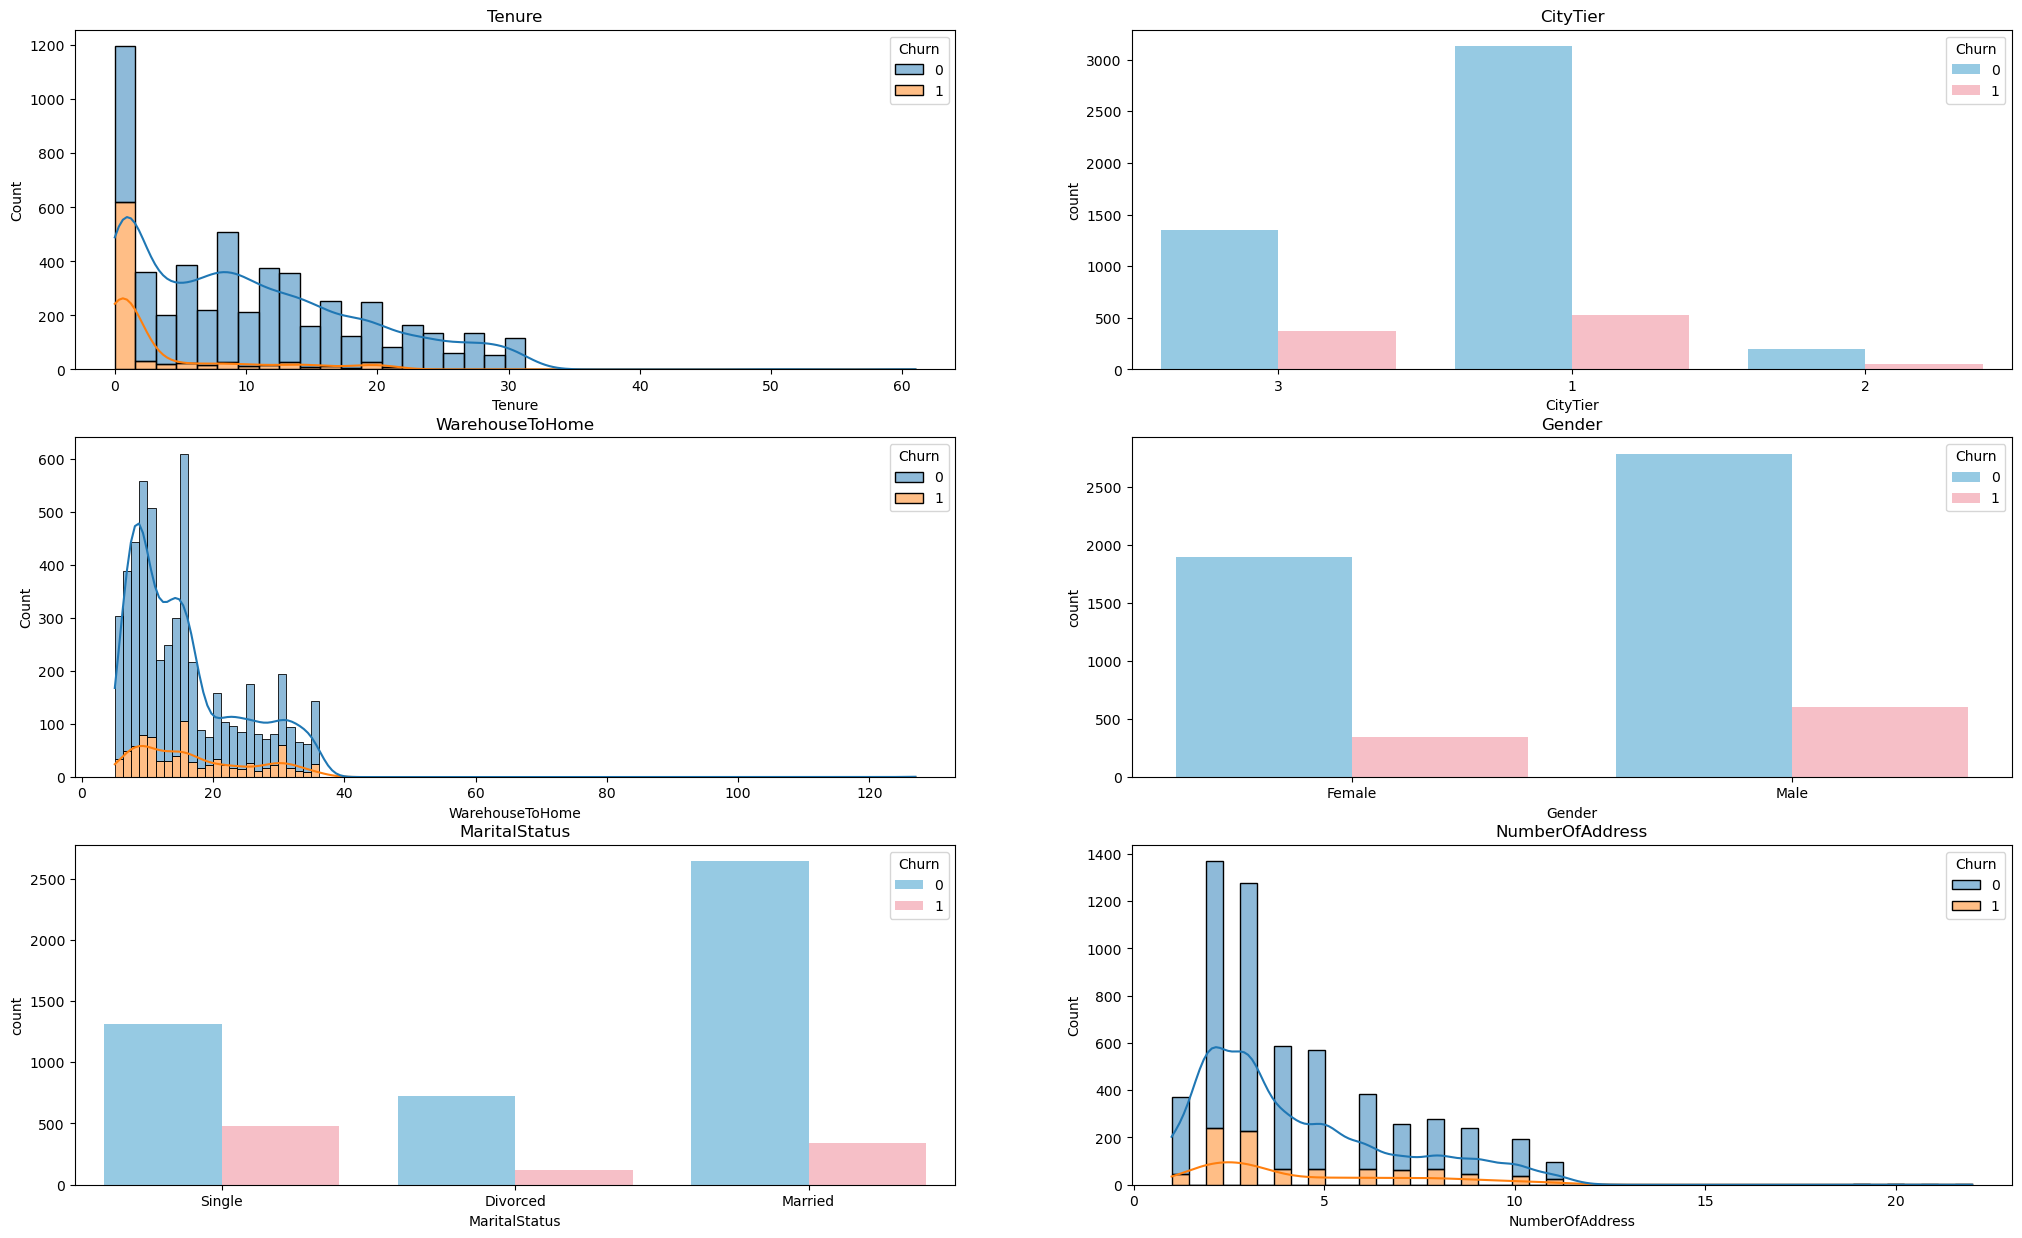

In [50]:
fig = plt.figure(figsize=(25,15))
for c,i in enumerate(demo):
    plt.subplot(3,2,c+1)
    if df[i].dtype == 'O':
        plt.title(i)
        sns.countplot(x= df[i], hue=df['Churn'], palette=['#89CFF0','#FFB6C1'])
    else:
        plt.title(i)
        sns.histplot(data=df, x=df[i], hue=df['Churn'], multiple='stack', kde=True)
       


Insights from above visualization:
- Tenure: The majority of Company X's customers have a tenure of less than 1 year, and within this group, there is the highest percentage of churn.
- CityTier: 

In [37]:
df['Gender'].dtype

dtype('O')